In [3]:
import numpy as np

from hfnet.datasets.colmap import Colmap
from hfnet.evaluation.utils import keypoints_warp_3D
from hfnet.evaluation.visualize import draw_keypoints
from utils import plot_images

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
config = {'sequences': 'reichstag', 'make_pairs': True, 'shuffle': True, 'max_num_pairs': 0} 
dataset = Colmap(**config)
data = dataset.get_test_set()

[10/11/2018 01:48:47 INFO] Colmap sequence reichstag contains 1841 pairs


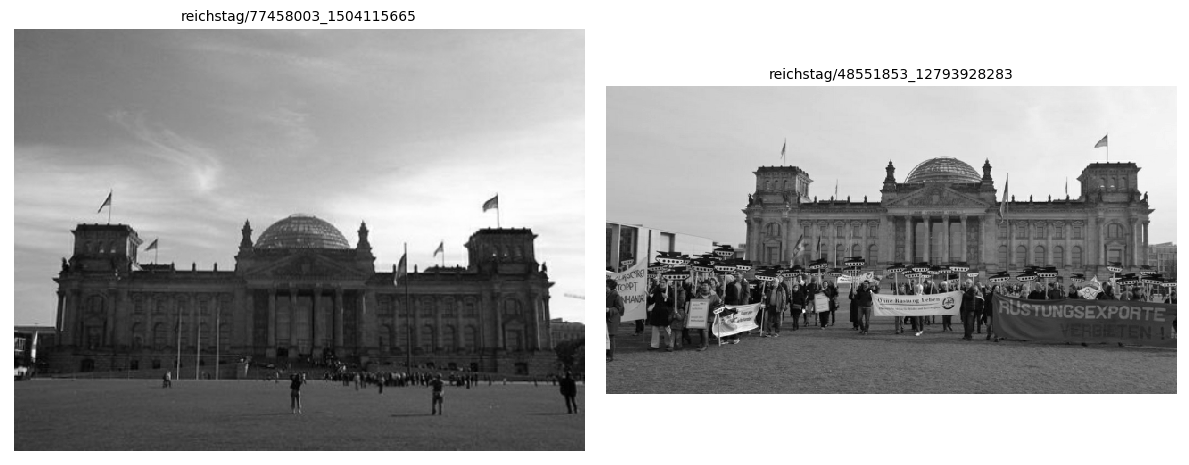

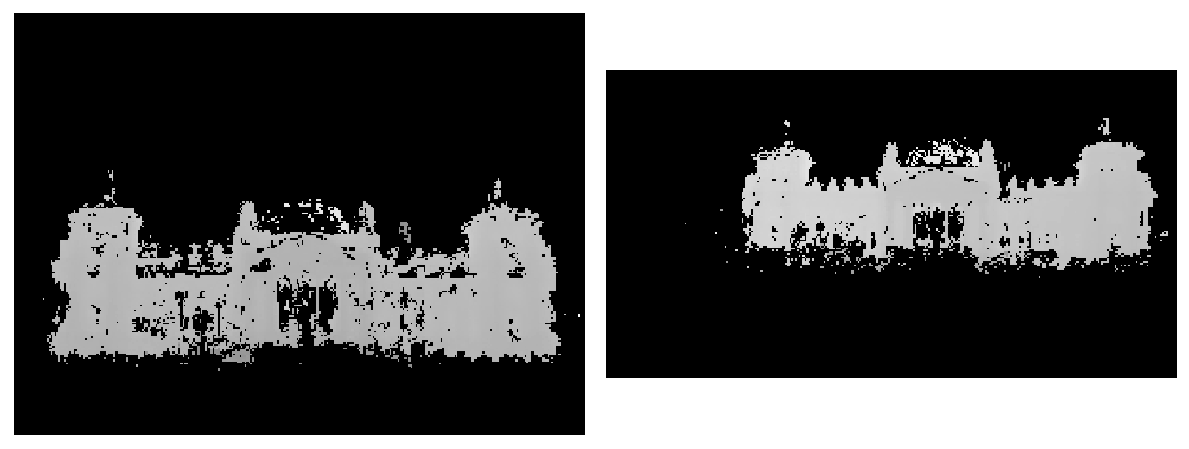

In [5]:
for _ in range(1):
    d = next(data)
    plot_images([d['image'], d['image2']],
              titles=[d['name'].decode('utf-8'), d['name2'].decode('utf-8')], normalize=True)
    plot_images([d['depth'], d['depth2']], normalize=True)

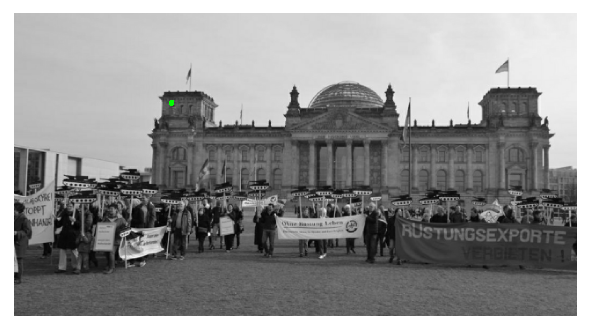

In [4]:
h, w = d['image2'].shape[:2]
kpts2 = np.array([[w*.28, h*0.3]])
plot_images([draw_keypoints(d['image2'], kpts2, radius=10)], normalize=True)

[[ 81.73154796 236.65612847]]


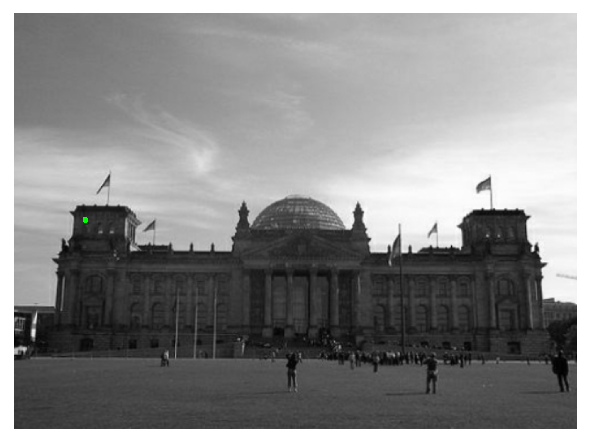

In [6]:
kpts2_w, vis = keypoints_warp_3D(kpts2, d['depth2'], d['K2'], d['K'], d['1_T_2'], d['image'].shape[:2])
print(kpts2_w)
plot_images([draw_keypoints(d['image'], kpts2_w, radius=10)], normalize=True)